### Firstly I'll import the libraries needed for the project

In [1]:
!pip install folium

In [2]:
import folium
import pandas as pd
import numpy as np
import xlrd
import io

### I will import one of the data sets that I will use - data set showing GDP for regions and also see some of its features, moreover will do some changes



In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
@hidden_cell

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_province_gdp = pd.read_excel(io.BytesIO(body.read()))
df_province_gdp.head()




,Unnamed: 0,2015,2016,2017,2018
0,Vidin,6276,6454,7389,7926
1,Vratsa,9190,9730,11827,15018
2,Lovech,7917,8792,9090,9653
3,Montana,7306,7878,8772,9033
4,Pleven,6985,7273,7880,8795


In [4]:
df_province_gdp.shape

(27, 5)

In [5]:
df_province_gdp.rename(columns = {'Unnamed: 0': 'city'}, inplace=True)
df_province_gdp.head()

,city,2015,2016,2017,2018
0,Vidin,6276,6454,7389,7926
1,Vratsa,9190,9730,11827,15018
2,Lovech,7917,8792,9090,9653
3,Montana,7306,7878,8772,9033
4,Pleven,6985,7273,7880,8795


### Let's import data set with the coordinates of each of the provinces and also see some features and make some changes

In [6]:
body = client_2caa1272e4714478930c0ed650528ea4.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-wjjn5y2sy0u4ch',Key='bg.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_bg_coord = pd.read_csv(body)
df_bg_coord.head()


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sofia,42.6975,23.3241,Bulgaria,BG,Sofia-Grad,primary,1355142.0,1355142.0
1,Plovdiv,42.1433,24.7489,Bulgaria,BG,Plovdiv,admin,384088.0,384088.0
2,Varna,43.2078,27.9169,Bulgaria,BG,Varna,admin,369162.0,369162.0
3,Burgas,42.5000,27.4667,Bulgaria,BG,Burgas,admin,226868.0,226868.0
4,Ruse,43.8475,25.9544,Bulgaria,BG,Ruse,admin,163712.0,163712.0


### Now  will merge the 2 tables and do some changes

In [7]:
df_coord_and_gdp = df_province_gdp.merge(df_bg_coord.iloc[:,:3], how='left', on='city')
df_coord_and_gdp.head()

,city,2015,2016,2017,2018,lat,lng
0,Vidin,6276,6454,7389,7926,43.9853,22.8764
1,Vratsa,9190,9730,11827,15018,43.2000,23.5500
2,Lovech,7917,8792,9090,9653,43.1342,24.7172
3,Montana,7306,7878,8772,9033,43.4078,23.2250
4,Pleven,6985,7273,7880,8795,43.4078,24.6203


In [8]:
df_coord_and_gdp.columns = df_coord_and_gdp.columns.astype('str')
df_coord_and_gdp.set_index('city', inplace=True)
df_coord_and_gdp

,2015,2016,2017,2018,lat,lng
city,,,,,,
Vidin,6276,6454,7389,7926,43.9853,22.8764
Vratsa,9190,9730,11827,15018,43.2000,23.5500
Lovech,7917,8792,9090,9653,43.1342,24.7172
Montana,7306,7878,8772,9033,43.4078,23.2250
Pleven,6985,7273,7880,8795,43.4078,24.6203
Veliko Tarnovo,8264,8608,9280,10434,43.0822,25.6317
Gabrovo,10442,11206,12455,13510,42.8711,25.3150
Razgrad,7740,8360,8984,9709,43.5267,26.5242
Ruse,9928,10551,11214,11769,43.8475,25.9544


In [9]:
df_coord_and_gdp.iloc[21, 4:6] = df_bg_coord.iloc[0, 1:3]
df_coord_and_gdp

,2015,2016,2017,2018,lat,lng
city,,,,,,
Vidin,6276,6454,7389,7926,43.9853,22.8764
Vratsa,9190,9730,11827,15018,43.2000,23.5500
Lovech,7917,8792,9090,9653,43.1342,24.7172
Montana,7306,7878,8772,9033,43.4078,23.2250
Pleven,6985,7273,7880,8795,43.4078,24.6203
Veliko Tarnovo,8264,8608,9280,10434,43.0822,25.6317
Gabrovo,10442,11206,12455,13510,42.8711,25.3150
Razgrad,7740,8360,8984,9709,43.5267,26.5242
Ruse,9928,10551,11214,11769,43.8475,25.9544


### I will sort them by average GDP, which will allow me to go further to the analysis


In [10]:
df_coord_and_gdp['Average'] = df_coord_and_gdp.iloc[:, :4].mean(axis=1)
df_coord_and_gdp

,2015,2016,2017,2018,lat,lng,Average
city,,,,,,,
Vidin,6276,6454,7389,7926,43.9853,22.8764,7011.25
Vratsa,9190,9730,11827,15018,43.2000,23.5500,11441.25
Lovech,7917,8792,9090,9653,43.1342,24.7172,8863.00
Montana,7306,7878,8772,9033,43.4078,23.2250,8247.25
Pleven,6985,7273,7880,8795,43.4078,24.6203,7733.25
Veliko Tarnovo,8264,8608,9280,10434,43.0822,25.6317,9146.50
Gabrovo,10442,11206,12455,13510,42.8711,25.3150,11903.25
Razgrad,7740,8360,8984,9709,43.5267,26.5242,8698.25
Ruse,9928,10551,11214,11769,43.8475,25.9544,10865.50


### First will make table of top 5, then of the last 5

In [11]:
df_average = df_coord_and_gdp.sort_values(['Average'], ascending=False, axis=0)
df_average.head()

,2015,2016,2017,2018,lat,lng,Average
city,,,,,,,
Sofia,27074,28836,30801,33437,42.6975,23.3241,30037.00
Stara Zagora,13515,16374,17534,17273,42.4247,25.6256,16174.00
Varna,12724,13046,14037,15479,43.2078,27.9169,13821.50
Gabrovo,10442,11206,12455,13510,42.8711,25.3150,11903.25
Burgas,10509,11575,12507,12585,42.5000,27.4667,11794.00


In [12]:
years = list(map(str, range(2015, 2019)))

In [13]:
df_average_top_5 = df_average['Average'].head()
df_average_top_5

city
Sofia           30037.00
Stara Zagora    16174.00
Varna           13821.50
Gabrovo         11903.25
Burgas          11794.00
Name: Average, dtype: float64

## Top 5 provinces by average GDP for 2015-2018


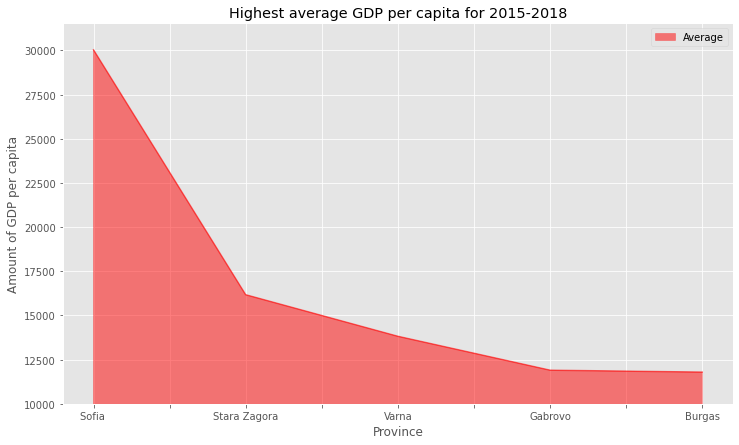

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
df_average_top_5.plot(kind='area', figsize=(12, 7), alpha=0.5, color='red')
plt.title('Highest average GDP per capita for 2015-2018')
plt.xlabel('Province')
plt.ylabel('Amount of GDP per capita')
plt.ylim(10000)
plt.legend(loc='upper right')


In [15]:
df_average_lowest_5 = df_average['Average'].tail()
df_average_lowest_5

city
Pernik       7507.25
Kardzhali    7330.00
Vidin        7011.25
Sliven       6736.75
Silistra     6466.50
Name: Average, dtype: float64

## Top 5 provinces based on lowest GDP for 2015-2018

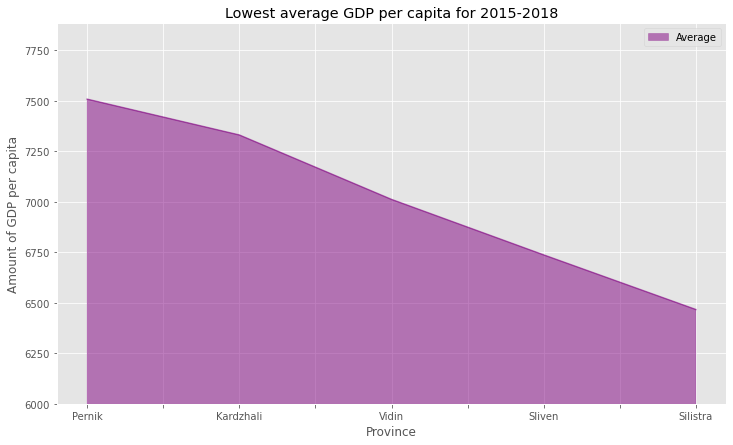

In [16]:
df_average_lowest_5.plot(kind='area', figsize=(12, 7), alpha=0.5, color='purple')
plt.title('Lowest average GDP per capita for 2015-2018')
plt.xlabel('Province')
plt.ylabel('Amount of GDP per capita')
plt.ylim(6000)
plt.legend(loc='upper right')

In [17]:

body = client_2caa1272e4714478930c0ed650528ea4.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-wjjn5y2sy0u4ch',Key='population.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pop = pd.read_excel(io.BytesIO(body.read()))
df_pop.head()


,Unnamed: 0,2015,2016,2017,2018
0,Blagoevgrad,185995,185060,184215,183143
1,Burgas,314987,314497,314036,313566
2,Varna,394793,395165,395488,395596
3,Veliko Tarnovo,171215,169869,168428,166535
4,Vidin,58087,56918,56000,54999


In [18]:
df_pop.rename(columns = {'Unnamed: 0': 'city'}, inplace=True)
df_pop.set_index('city', inplace=True)
df_pop.columns = df_pop.columns.astype('str')
df_pop.rename(columns={'2015': 'pop_2015', '2016': 'pop_2016', '2017': 'pop_2017', '2018': 'pop_2018'}, inplace=True)
df_pop.head()

,pop_2015,pop_2016,pop_2017,pop_2018
city,,,,
Blagoevgrad,185995,185060,184215,183143
Burgas,314987,314497,314036,313566
Varna,394793,395165,395488,395596
Veliko Tarnovo,171215,169869,168428,166535
Vidin,58087,56918,56000,54999


### Now will locate all of the provinces

In [19]:
bg_map = folium.Map(location=[42.7249925, 25.4833039], zoom_start=7)
from folium import plugins

In [20]:
markers = plugins.MarkerCluster().add_to(bg_map)
for lat, lng, label, province in zip(df_average.lat, df_average.lng, df_average['Average'], df_average.index.values):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup='Average GDP per capita for {} province: {}'.format(province, label),
    ).add_to(markers)

bg_map

In [21]:
df_pop.rename(columns={'2015': 'pop_2015', '2016': 'pop_2016', '2017': 'pop_2017', '2018': 'pop_2018'}, inplace=True)
df_pop

,pop_2015,pop_2016,pop_2017,pop_2018
city,,,,
Blagoevgrad,185995,185060,184215,183143
Burgas,314987,314497,314036,313566
Varna,394793,395165,395488,395596
Veliko Tarnovo,171215,169869,168428,166535
Vidin,58087,56918,56000,54999
Vratsa,99435,98139,96907,95695
Gabrovo,93489,91904,90287,88800
Dobrich,124214,123051,121666,120259
Kardzhali,62184,62192,62597,63016


## Now will merge the gdp and the coordinates table 

In [22]:
df_gdp_pop_coord = df_coord_and_gdp.merge(df_pop, how='left', on='city')
df_gdp_pop_coord

,2015,2016,2017,2018,lat,lng,Average,pop_2015,pop_2016,pop_2017,pop_2018
city,,,,,,,,,,,
Vidin,6276,6454,7389,7926,43.9853,22.8764,7011.25,58087,56918,56000,54999
Vratsa,9190,9730,11827,15018,43.2000,23.5500,11441.25,99435,98139,96907,95695
Lovech,7917,8792,9090,9653,43.1342,24.7172,8863.00,82203,80951,79690,78589
Montana,7306,7878,8772,9033,43.4078,23.2250,8247.25,87012,85751,84621,83412
Pleven,6985,7273,7880,8795,43.4078,24.6203,7733.25,167220,165060,162991,161005
Veliko Tarnovo,8264,8608,9280,10434,43.0822,25.6317,9146.50,171215,169869,168428,166535
Gabrovo,10442,11206,12455,13510,42.8711,25.3150,11903.25,93489,91904,90287,88800
Razgrad,7740,8360,8984,9709,43.5267,26.5242,8698.25,55260,54432,53691,53002
Ruse,9928,10551,11214,11769,43.8475,25.9544,10865.50,174653,173505,172312,170634


In [23]:
df_gdp_pop_coord = df_gdp_pop_coord[['2015', '2016', '2017', '2018', 'pop_2015', 'pop_2016', 'pop_2017', 'pop_2018', 'Average', 'lat', 'lng']]
df_gdp_pop_coord.head()

,2015,2016,2017,2018,pop_2015,pop_2016,pop_2017,pop_2018,Average,lat,lng
city,,,,,,,,,,,
Vidin,6276,6454,7389,7926,58087,56918,56000,54999,7011.25,43.9853,22.8764
Vratsa,9190,9730,11827,15018,99435,98139,96907,95695,11441.25,43.2000,23.5500
Lovech,7917,8792,9090,9653,82203,80951,79690,78589,8863.00,43.1342,24.7172
Montana,7306,7878,8772,9033,87012,85751,84621,83412,8247.25,43.4078,23.2250
Pleven,6985,7273,7880,8795,167220,165060,162991,161005,7733.25,43.4078,24.6203


### Let's see what is the correlation between the population and the GDP for the 4 years

In [24]:
df_gdp_pop_coord.iloc[:, :-2].corr()

,2015,2016,2017,2018,pop_2015,pop_2016,pop_2017,pop_2018,Average
2015,1.000000,0.993737,0.992331,0.986153,0.922415,0.922500,0.922329,0.922397,0.996009
2016,0.993737,1.000000,0.997598,0.985083,0.906305,0.906393,0.906230,0.906311,0.997204
2017,0.992331,0.997598,1.000000,0.992070,0.900095,0.900178,0.900009,0.900093,0.998868
2018,0.986153,0.985083,0.992070,1.000000,0.901334,0.901423,0.901285,0.901387,0.994592
pop_2015,0.922415,0.906305,0.900095,0.901334,1.000000,0.999998,0.999991,0.999978,0.909962
pop_2016,0.922500,0.906393,0.900178,0.901423,0.999998,1.000000,0.999998,0.999990,0.910048
pop_2017,0.922329,0.906230,0.900009,0.901285,0.999991,0.999998,1.000000,0.999997,0.909888
pop_2018,0.922397,0.906311,0.900093,0.901387,0.999978,0.999990,0.999997,1.000000,0.909974
Average,0.996009,0.997204,0.998868,0.994592,0.909962,0.910048,0.909888,0.909974,1.000000


In [25]:
import seaborn as sns

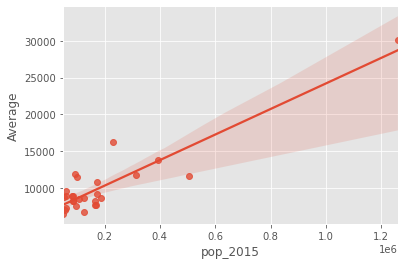

In [26]:
sns.regplot(x='pop_2015', y='Average', data=df_gdp_pop_coord)

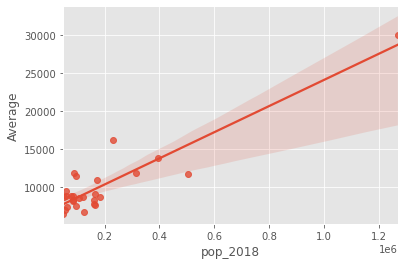

In [27]:
sns.regplot(x='pop_2018', y='Average', data=df_gdp_pop_coord)

### Now we clearly see that there is positive correlation between the 2 features - i will prove that 'people are going to provinces where the GDP (salary) is higher'

In [28]:
df_gdp_pop_coord = df_gdp_pop_coord.sort_values(['Average'], ascending=False)
df_gdp_pop_coord.head()

,2015,2016,2017,2018,pop_2015,pop_2016,pop_2017,pop_2018,Average,lat,lng
city,,,,,,,,,,,
Sofia,27074,28836,30801,33437,1260120,1264064,1266295,1269384,30037.00,42.6975,23.3241
Stara Zagora,13515,16374,17534,17273,232131,231243,230078,229132,16174.00,42.4247,25.6256
Varna,12724,13046,14037,15479,394793,395165,395488,395596,13821.50,43.2078,27.9169
Gabrovo,10442,11206,12455,13510,93489,91904,90287,88800,11903.25,42.8711,25.3150
Burgas,10509,11575,12507,12585,314987,314497,314036,313566,11794.00,42.5000,27.4667


In [29]:
df_sofia = {'GDP': [27074, 28836, 30801, 33437], 'population': [1260120, 1264064, 1266295, 1269384]}

In [30]:
df_sofia = pd.DataFrame(data=df_sofia)

In [31]:
df_sofia.set_index('GDP', inplace=True)
df_sofia

,population
GDP,
27074,1260120
28836,1264064
30801,1266295
33437,1269384


### Let's start from the city with highest GDP - we see that population is increasing each year, as the GDP increases.

Text(0, 0.5, 'Population in million people')

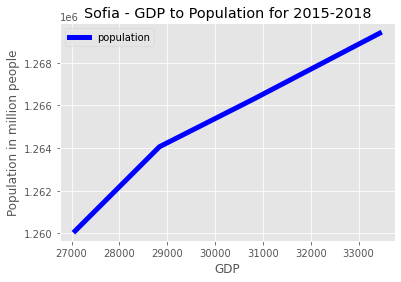

In [32]:
df_sofia.plot(linewidth=5, color='b')
plt.title('Sofia - GDP to Population for 2015-2018')
plt.ylabel('Population in million people')

In [33]:
stz_gdp = df_gdp_pop_coord.iloc[1, :4].values
stz_pop = df_gdp_pop_coord.iloc[1, 4:8].values

In [34]:
df_stz = pd.DataFrame(list(zip(stz_gdp, stz_pop)), 
               columns =['GDP', 'Population']) 
df_stz

,GDP,Population
0,13515.0,232131.0
1,16374.0,231243.0
2,17534.0,230078.0
3,17273.0,229132.0


### In the country with 2nd highest GDP - we see that the gdp is droping so and the population is also dropping

Text(0, 0.5, 'Population')

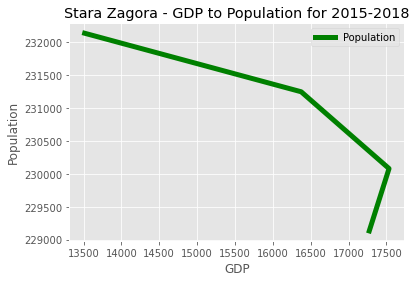

In [35]:
df_stz.set_index('GDP', inplace=True)
df_stz.plot(linewidth=5, color='g')
plt.title('Stara Zagora - GDP to Population for 2015-2018')
plt.ylabel('Population')

### Now the same for 2 cities at the bottom of the ranking on GDP

In [36]:
df_gdp_pop_coord.tail(2)

,2015,2016,2017,2018,pop_2015,pop_2016,pop_2017,pop_2018,Average,lat,lng
city,,,,,,,,,,,
Sliven,5869,6408,7070,7600,125585,124798,124109,122910,6736.75,42.6808,26.3164
Silistra,5962,6124,6751,7029,50306,49620,48908,48382,6466.50,44.1186,27.2603


In [37]:
slv_gdp = df_gdp_pop_coord.loc['Sliven', years].values
slv_pop = df_gdp_pop_coord.loc['Sliven', ['pop_2015', 'pop_2016', 'pop_2017', 'pop_2018']].values
df_slv = pd.DataFrame(list(zip(slv_gdp, slv_pop)), 
               columns =['GDP', 'Population']) 
df_slv

,GDP,Population
0,5869.0,125585.0
1,6408.0,124798.0
2,7070.0,124109.0
3,7600.0,122910.0


### We see that as the GDP is dropping, population is also dropping

Text(0, 0.5, 'Population')

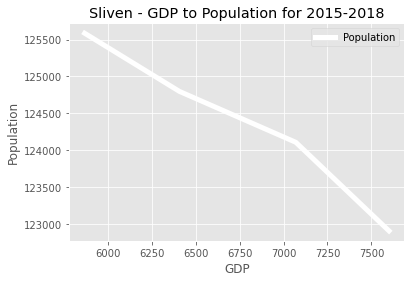

In [38]:
df_slv.set_index('GDP', inplace=True)
df_slv.plot(linewidth=5, color='w')
plt.title('Sliven - GDP to Population for 2015-2018')
plt.ylabel('Population')

### It is the same like the other province at the bottom


Text(0, 0.5, 'Population')

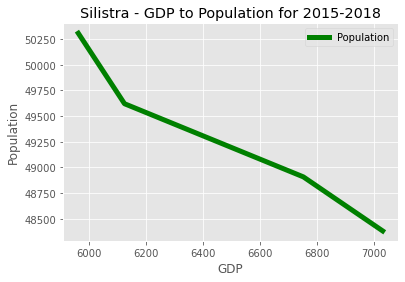

In [39]:
sls_gdp = df_gdp_pop_coord.loc['Silistra', years].values
sls_pop = df_gdp_pop_coord.loc['Silistra', ['pop_2015', 'pop_2016', 'pop_2017', 'pop_2018']].values
df_sls = pd.DataFrame(list(zip(sls_gdp, sls_pop)), 
               columns =['GDP', 'Population']) 
df_sls.set_index('GDP', inplace=True)
df_sls.plot(linewidth=5, color='g')
plt.title('Silistra - GDP to Population for 2015-2018')
plt.ylabel('Population')